In [4]:
import pandas as pd
import numpy as np
import spacy
import networkx as nx

import matplotlib.pyplot as plt

In [2]:
# import english language model for spacy
!python3 -m spacy download en_core_web_sm

/Users/ahmirpostell/Desktop/witcher_project/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 5.4 MB/s eta 0:00:00m eta 0:00:010:01:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [5]:
# Load spacy English language model
NER = spacy.load("en_core_web_sm")

## Strategy

## Load Books

In [6]:
import os

# get all book files in the data directory
all_books = [b for b in os.scandir('data') if '.txt' in b.name]

In [7]:
all_books

[<DirEntry '2 The Sword of Destiny.txt'>,
 <DirEntry '3 Blood of Elves.txt'>,
 <DirEntry '7 The Lady of the Lake.txt'>,
 <DirEntry '4 Times of Contempt.txt'>,
 <DirEntry '1 The Last Wish.txt'>,
 <DirEntry '8 something ends something begins.txt'>,
 <DirEntry '6 The Tower of the Swallow.txt'>,
 <DirEntry '5 Baptism of Fire.txt'>]

### starting with one book

In [10]:
book = all_books[0]
book_text = open(book).read()
book_doc= NER(book_text)

In [11]:
# visualize identified entities
displacy.render(book_doc[0:2000], style="ent", jupyter=True)

## load character names

In [12]:
# read characters
character_df = pd.read_csv('characters.csv')

In [13]:
# remove brackets and text within brackets in character dataframe using Regular Expression module
import re
character_df['character'] = character_df['character'].apply(lambda x: re.sub( "[\(].*?[\)]", "", x))
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])

In [15]:
pd.set_option('display.max_rows', None)
character_df

Unnamed: 0                                               book  \
0              0                Category:Baptism of Fire characters   
1              1                Category:Baptism of Fire characters   
2              2                Category:Baptism of Fire characters   
3              3                Category:Baptism of Fire characters   
4              4                Category:Baptism of Fire characters   
5              5                Category:Baptism of Fire characters   
6              6                Category:Baptism of Fire characters   
7              7                Category:Baptism of Fire characters   
8              8                Category:Baptism of Fire characters   
9              9                Category:Baptism of Fire characters   
10            10                Category:Baptism of Fire characters   
11            11                Category:Baptism of Fire characters   
12            12                Category:Baptism of Fire characters   
13            13                Category:Baptism of Fire characters   
14            14                Category:Baptism of Fire characters   
15            15                Category:Baptism of Fire characters   
16            16                Category:Baptism of Fire characters   
17            17                Category:Baptism of Fire characters   
18            18                Category:Baptism of Fire characters   
19            19                Category:Baptism of Fire characters   
20            20                Category:Baptism of Fire characters   
21            21                Category:Baptism of Fire characters   
22            22                Category:Baptism of Fire characters   
23            23                Category:Baptism of Fire characters   
24            24                Category:Baptism of Fire characters   
25            25                Category:Baptism of Fire characters   
26            26                Category:Baptism of Fire characters   
27            27                Category:Baptism of Fire characters   
28            28                Category:Baptism of Fire characters   
29            29                Category:Baptism of Fire characters   
30            30                Category:Baptism of Fire characters   
31            31                Category:Baptism of Fire characters   
32            32                Category:Baptism of Fire characters   
33            33                Category:Baptism of Fire characters   
34            34                Category:Baptism of Fire characters   
35            35                Category:Baptism of Fire characters   
36            36                Category:Baptism of Fire characters   
37            37                Category:Baptism of Fire characters   
38            38                Category:Baptism of Fire characters   
39            39                Category:Baptism of Fire characters   
40            40                Category:Baptism of Fire characters   
41            41                Category:Baptism of Fire characters   
42            42                Category:Baptism of Fire characters   
43            43                Category:Baptism of Fire characters   
44            44                Category:Baptism of Fire characters   
45            45                Category:Baptism of Fire characters   
46            46                Category:Baptism of Fire characters   
47            47                Category:Baptism of Fire characters   
48            48                Category:Baptism of Fire characters   
49            49                Category:Baptism of Fire characters   
50            50                Category:Baptism of Fire characters   
51            51                Category:Baptism of Fire characters   
52            52                Category:Baptism of Fire characters   
53            53                Category:Baptism of Fire characters   
54            54                Category:Baptism of Fire characters   
55            55              

## get named entity list per sentence

In [22]:
sent_entity_df = []

# loop through sentences, store named entity list for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
sent_entity_df = pd.DataFrame(sent_entity_df)

In [17]:
sent_entity_df

sentence  \
0      (﻿The, Limits, of, the, Possible, \n, I, \n, "...   
1      (", It, 's, been, an, hour, and, a, quarter, s...   
2                                 (He, 's, done, for, .)   
3      (", \n, The, townsfolk, ,, huddled, together, ...   
4      (A, fat, man, dressed, in, a, yellow, smock, \...   
5      (", We, have, to, wait, a, bit, longer, ,, ", ...   
6      (", Why, wait, ?, ", snorted, pimply, ,, ", Th...   
7      (Anyone, goes, down, there, ,, that, 's, the, ...   
8      (Have, you, forgotten, how, many, \n, have, di...   
9      (What, are, we, waiting, for, ?, ", \n, ", Thi...   
10         (murmured, the, fat, man, uncertainly, ., \n)   
11     (", An, agreement, you, made, with, a, living,...   
12     (", He, is, now, dead, ,, as, surely, as, the,...   
13     (It, was, plain, from, the, beginning, that, h...   
14     (He, did, n't, even, take, a, mirror, with, hi...   
15     (", \n, ", At, least, we, 've, saved, some, co...   
16                   (You, might, as, well, go, home, .)   
17     (As, far, as, the, sorcerer, 's, horse, and, b...   
18     (well, it, \n, would, be, a, shame, if, they, ...   
19     (", \n, ", Yes, ,, ", said, the, butcher, ,, "...   
20                           (Let, 's, take, a, look, .)   
21     (", \n, ", What, are, you, doing, ?, ", \n, ",...   
22     (Do, n't, get, in, the, way, unless, you, want...   
23     (", A, fine, old, mare, ,, ", repeated, the, b...   
24      (", Leave, the, horse, alone, ,, my, darling, .)   
25     (", \n, The, butcher, slowly, turned, around, ...   
26     (The, stranger, had, thick, curly, brown, hair...   
27                         (He, had, no, weapons, ., \n)   
28     (3, \n, ", Step, away, from, the, horse, ,, ",...   
29                          (", What, have, we, here, ?)   
30     (A, horse, and, saddlebags, belonging, to, ano...   
31     (Is, that, honourable, ?, ", \n, Pimply, slowl...   
32     (The, butcher, gave, a, nod, and, signalled, t...   
33     (Both, carried, heavy, clubs, ,, like, those, ...   
34     (", Who, are, you, ?, ", demanded, the, pimply...   
35                (", \n, ", You, carry, no, weapons, .)   
36     (", \n, ", That, 's, true, ,, ", the, stranger...   
37     (", \n, ", That, 's, no, good, ,, ", pimply, d...   
38     (", \n, The, butcher, also, drew, a, blade, ;,...   
39     (The, other, two, men, approached, ,, brandish...   
40     (", I, do, n't, carry, weapons, ,, ", responde...   
41     (", \n, From, behind, the, ruins, ,, two, youn...   
42     (The, crowd, quickly, parted, ,, retreated, th...   
43     (The, girls, smiled, ,, flashing, their, teeth...   
44     (They, had, blue, stripes, tattooed, from, the...   
45     (Lynx, pelt, clad, their, strong, muscles, fro...   
46     (From, behind, the, mail, -, clad, shoulder, o...   
47     (Pimply, got, down, on, one, knee, and, slowly...   
48     (From, the, hole, in, ruins, came, a, rumble, ...   
49     (Following, the, hands, ,, a, white, head, app...   
50               (A, murmur, escaped, the, crowd, ., \n)   
51     (The, alabaster, -, haired, man, straightened,...   
52     (Holding, the, beast, by, its, long, lizard, -...   
53     (The, burgrave, jumped, backwards, and, trippe...   
54     (Its, slashed, throat, ,, once, carmine, ,, wa...   
55              (Its, sunken, eyes, were, glassy, ., \n)   
56     (", Here, 's, the, basilisk, ,, ", said, the, ...   
57     (I, will, check, them, ,, I, 'm, warning, you, .)   
58     (", \n, 4, \n, With, shaking, hands, ,, the, b...   
59     (The, white, -, haired, man, looked, around, a...   
60     (He, also, noticed, the, man, in, the, brown, ...   
61     (", It, 's, always, the, same, ,, ", he, said,...   
62     (You, people, never, change, ,, damn, you, to,...   
63     (", \n, ", We, have, n't, touched, your, bags,...   
64     (The, men, armed, with, the, clubs, had, long,...   
65     (", Your, things, have, not, been, disturbed, ...   
66     (At, the, sight, of, 

In [24]:
# function to filter out non-character entities
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list
            if ent in list(character_df.character)
            or ent in list(character_df.character_firstname)]

In [25]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

sentence  \
85                       (I, am, Geralt, of, Rivia, .)   
95   (Is, there, anything, keeping, you, in, this, ...   
102  (", \n, ", Borch, ,, ", replied, Geralt, ,, wh...   
106  (", \n, ", There, are, some, ,, ", Geralt, rep...   
110  (", \n, Geralt, took, off, a, glove, and, shoo...   
140  (", I, forgot, ,, ", Three, Jackdaws, winked, ...   
151  (Geralt, loosened, his, belt, ,, removed, his,...   
157  (", Do, the, girls, speak, the, common, langua...   
160  (How, 's, your, soup, ,, Geralt, ?, ", \n, ", ...   
169  (Yet, there, is, a, certain, principal, underl...   

                     entities character_entities  
85          [Geralt of Rivia]  [Geralt of Rivia]  
95          [Geralt of Rivia]  [Geralt of Rivia]  
102           [Borch, Geralt]           [Geralt]  
106                  [Geralt]           [Geralt]  
110                  [Geralt]           [Geralt]  
140  [Three Jackdaws, Geralt]           [Geralt]  
151                  [Geralt]           [Geralt]  
157                  [Geralt]           [Geralt]  
160             [Geralt, Hmm]           [Geralt]  
169                  [Geralt]           [Geralt]

In [26]:
# take only fisrt name of characters
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])

/var/folders/58/2qwvnyt504d52wnhtdkc3j080000gn/T/ipykernel_5085/2534595785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])


In [27]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

sentence  \
85                         (I, am, Geralt, of, Rivia, .)   
95     (Is, there, anything, keeping, you, in, this, ...   
102    (", \n, ", Borch, ,, ", replied, Geralt, ,, wh...   
106    (", \n, ", There, are, some, ,, ", Geralt, rep...   
110    (", \n, Geralt, took, off, a, glove, and, shoo...   
...                                                  ...   
11309  (He, only, saw, black, -, gloved, hands, squee...   
11311                                 (Oh, ,, Geralt, !)   
11316                            (Say, it, ,, Geralt, !)   
11317  (Forever, !, Say, it, !, ", \n, ", Forever, ,,...   
11322  (", \n, Yurga, saw, astonishment, in, the, eye...   

                      entities character_entities  
85           [Geralt of Rivia]           [Geralt]  
95           [Geralt of Rivia]           [Geralt]  
102            [Borch, Geralt]           [Geralt]  
106                   [Geralt]           [Geralt]  
110                   [Geralt]           [Geralt]  
...                        ...                ...  
11309                   [Ciri]             [Ciri]  
11311                 [Geralt]           [Geralt]  
11316                 [Geralt]           [Geralt]  
11317  [Forever, Ciri, Geralt]     [Ciri, Geralt]  
11322                  [Yurga]            [Yurga]  

[1725 rows x 3 columns]

## create relationships

In [39]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i + 5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])

    #if i > 200 and i < 300:
        #print(char_list)

    # remove duplicated character that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list))
                  if (i==0) or char_list[i] != char_list[i-1]]

    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({'source': a, 'target':b})

In [40]:
relationship_df = pd.DataFrame(relationships)

In [41]:
relationship_df

source    target
0       Geralt  Niedamir
1       Geralt  Niedamir
2       Geralt  Niedamir
3     Niedamir    Geralt
4     Niedamir    Geralt
...        ...       ...
3380      Ciri    Geralt
3381    Geralt      Ciri
3382      Ciri    Geralt
3383      Ciri    Geralt
3384    Geralt     Yurga

[3385 rows x 2 columns]

In [42]:
# sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis=1), columns = relationship_df.columns)
relationship_df

source    target
0     Geralt  Niedamir
1     Geralt  Niedamir
2     Geralt  Niedamir
3     Geralt  Niedamir
4     Geralt  Niedamir
...      ...       ...
3380    Ciri    Geralt
3381    Ciri    Geralt
3382    Ciri    Geralt
3383    Ciri    Geralt
3384  Geralt     Yurga

[3385 rows x 2 columns]

In [43]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source", "target"], sort=False, as_index=False).sum()

In [44]:
relationship_df

source    target  value
0        Geralt  Niedamir     52
1          Eyck    Geralt     51
2    Dorregaray    Geralt     30
3    Dorregaray  Yennefer     44
4        Geralt    Yarpen     24
..          ...       ...    ...
145      Geralt     Roach      8
146       Roach     Yurga     17
147         Two     Yurga      5
148      Nadbor     Sulik      5
149       Sulik     Yurga      3

[150 rows x 3 columns]

In [45]:
# create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df,
                           source = 'source',
                           target = 'target',
                           edge_attr = "value",
                           create_using = nx.Graph())

## graph visualization - Networkx

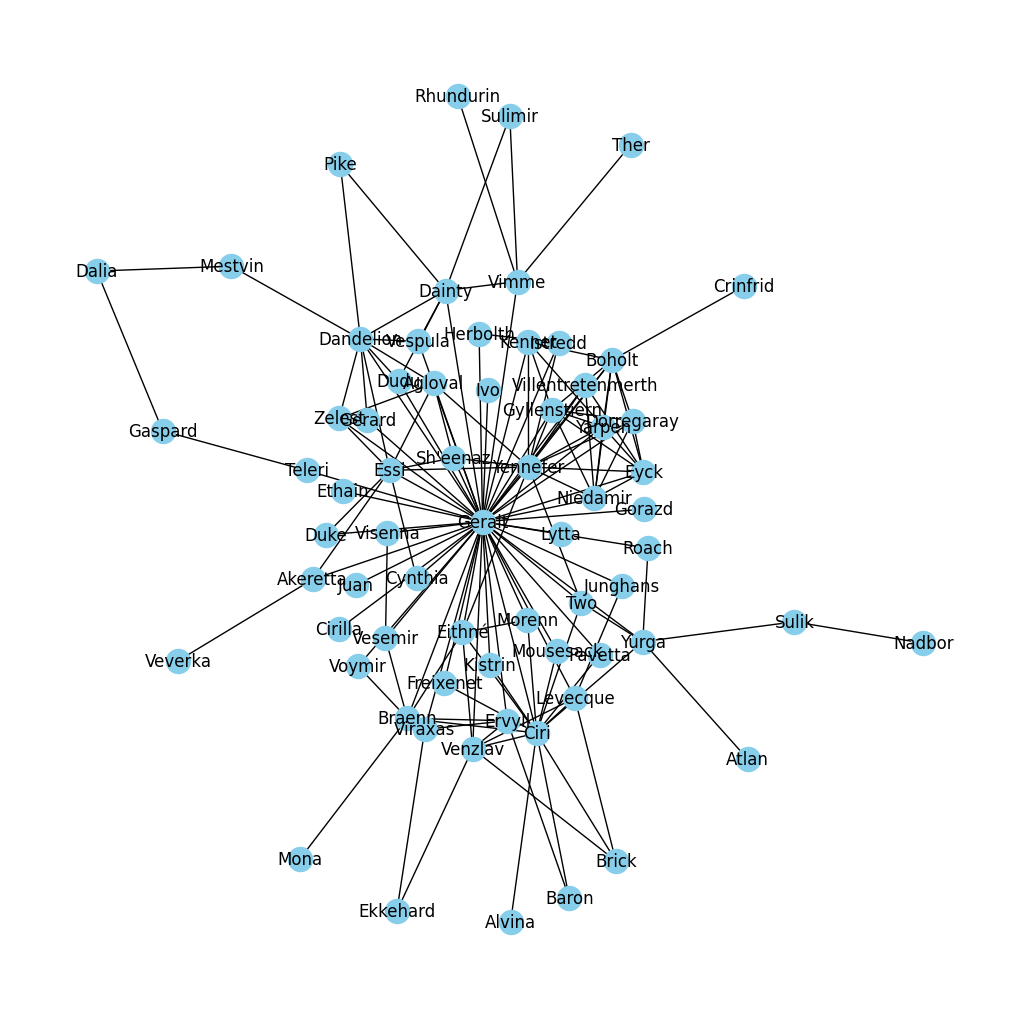

In [48]:
plt.figure(figsize=(10,10))
# the kamada kawai layout looks the most reasonable for this project
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos)

## graph visualization - Pyvis

In [51]:
from pyvis.network import Network
net = Network(notebook=True, width="1000px", height="700px", bgcolor="#222222", font_color='white')

node_degree = dict(G.degree)

# setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcher.html")

witcher.html


## the most important characters in The Witcher

In [52]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Geralt': 0.7462686567164178,
 'Niedamir': 0.11940298507462686,
 'Eyck': 0.11940298507462686,
 'Dorregaray': 0.08955223880597014,
 'Yennefer': 0.22388059701492538,
 'Yarpen': 0.1044776119402985,
 'Gyllenstiern': 0.11940298507462686,
 'Boholt': 0.13432835820895522,
 'Kennet': 0.07462686567164178,
 'Crinfrid': 0.014925373134328358,
 'Villentretenmerth': 0.05970149253731343,
 'Istredd': 0.04477611940298507,
 'Herbolth': 0.029850746268656716,
 'Ivo': 0.014925373134328358,
 'Two': 0.05970149253731343,
 'Dandelion': 0.14925373134328357,
 'Pike': 0.029850746268656716,
 'Dainty': 0.1044776119402985,
 'Vespula': 0.04477611940298507,
 'Vimme': 0.07462686567164178,
 'Sulimir': 0.029850746268656716,
 'Ther': 0.014925373134328358,
 'Rhundurin': 0.014925373134328358,
 'Dudu': 0.04477611940298507,
 "Sh'eenaz": 0.05970149253731343,
 'Agloval': 0.08955223880597014,
 'Gaspard': 0.029850746268656716,
 'Teleri': 0.029850746268656716,
 'Dalia': 0.029850746268656716,
 'Mestvin': 0.029850746268656716,
 'Ess

<Axes: >

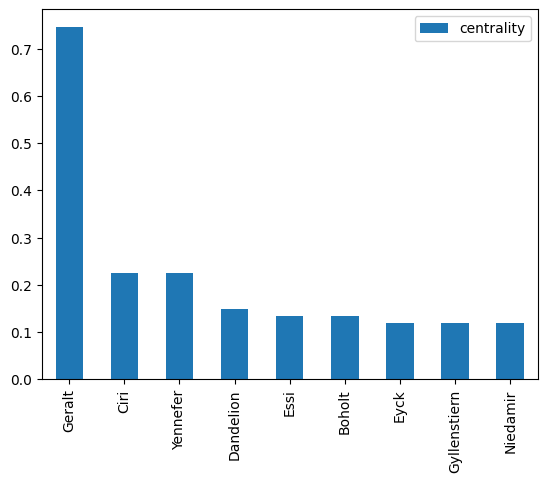

In [54]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar')

<Axes: >

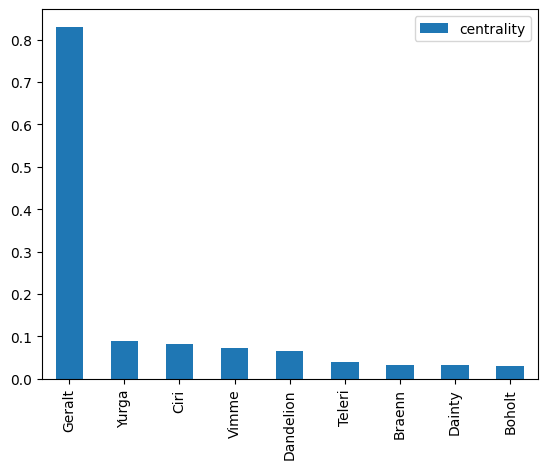

In [55]:
# betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar')

<Axes: >

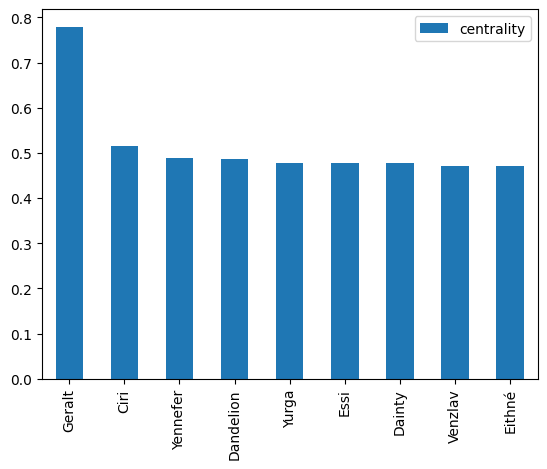

In [56]:
# closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar')

In [57]:
# save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

## community detection

In [60]:
import community as community_louvian

In [64]:
communities = community_louvian.best_partition(G)

In [65]:
communities

{'Geralt': 0,
 'Niedamir': 1,
 'Eyck': 1,
 'Dorregaray': 1,
 'Yennefer': 1,
 'Yarpen': 1,
 'Gyllenstiern': 1,
 'Boholt': 1,
 'Kennet': 1,
 'Crinfrid': 1,
 'Villentretenmerth': 1,
 'Istredd': 0,
 'Herbolth': 0,
 'Ivo': 0,
 'Two': 2,
 'Dandelion': 3,
 'Pike': 3,
 'Dainty': 3,
 'Vespula': 3,
 'Vimme': 3,
 'Sulimir': 3,
 'Ther': 3,
 'Rhundurin': 3,
 'Dudu': 3,
 "Sh'eenaz": 4,
 'Agloval': 4,
 'Gaspard': 3,
 'Teleri': 3,
 'Dalia': 3,
 'Mestvin': 3,
 'Essi': 4,
 'Gerard': 3,
 'Zelest': 4,
 'Duke': 4,
 'Akeretta': 4,
 'Veverka': 4,
 'Ethain': 0,
 'Juan': 0,
 'Cynthia': 4,
 'Braenn': 0,
 'Ciri': 5,
 'Ervyll': 5,
 'Eithné': 5,
 'Voymir': 0,
 'Kistrin': 5,
 'Alvina': 5,
 'Vesemir': 0,
 'Cirilla': 0,
 'Freixenet': 5,
 'Venzlav': 5,
 'Ekkehard': 5,
 'Viraxas': 5,
 'Morenn': 5,
 'Mona': 0,
 'Pavetta': 5,
 'Baron': 5,
 'Junghans': 5,
 'Brick': 5,
 'Levecque': 5,
 'Mousesack': 5,
 'Yurga': 2,
 'Visenna': 0,
 'Atlan': 2,
 'Lytta': 0,
 'Gorazd': 0,
 'Roach': 2,
 'Nadbor': 2,
 'Sulik': 2}

In [66]:
nx.set_node_attributes(G, communities, 'group')

In [67]:
com_net = Network(notebook=True, width="1000px", height="700px", bgcolor="#222222", font_color='white')
com_net.from_nx(G)
com_net.show("witcher_communities.html")

witcher_communities.html


In [68]:
# initialize empty list for graphs from books
books_graph = []
all_books = [b for b in os.scandir('data') if '.txt' in b.name]

# sort dir entries by name
all_books.sort(key=lambda x: x.name)

In [69]:
from lib.utils.functions import *

In [70]:
# loop through book list and create graphs
for book in all_books:
    book_text = ner(book)

    # get list of entries per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)

    # select only character entities
    sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

    # filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]

    # take only fisrt name of characters
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])

    # create relationship df
    relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)
    
    # create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df,
                           source = 'source',
                           target = 'target',
                           edge_attr = "value",
                           create_using = nx.Graph())

    books_graph.append(G)

/var/folders/58/2qwvnyt504d52wnhtdkc3j080000gn/T/ipykernel_5085/2034821833.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])
/var/folders/58/2qwvnyt504d52wnhtdkc3j080000gn/T/ipykernel_5085/2034821833.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [it

<Axes: >

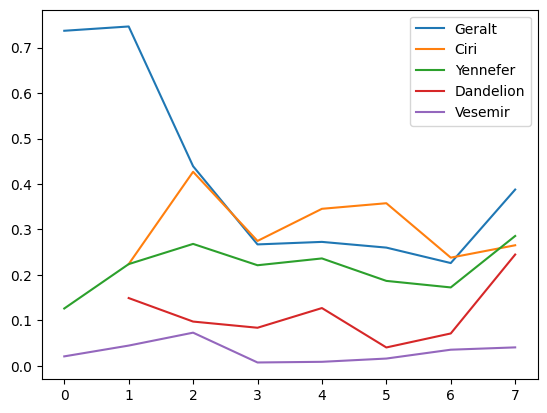

In [72]:
# creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# creating a DataFrame from the list of degree centralities in all books
degree_evol_df = pd.DataFrame.from_records(evol)

# plotting the degree centrality evolution of 4 main characters
degree_evol_df[['Geralt', 'Ciri', 'Yennefer', 'Dandelion','Vesemir']].plot()